In [2]:
!pip install tensorflow==2.14.0 

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [12]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#!pip install tensorflow-gpu==2.12.0 

In [1]:
import cv2
import time
import mediapipe as mp
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
def mediapipe_detection(image , model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Conversion of color formats
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
frame

array([[[ 78,  91, 104],
        [ 77,  92, 102],
        [ 76,  93, 100],
        ...,
        [ 91,  80, 148],
        [ 90,  80, 144],
        [ 90,  80, 144]],

       [[ 76,  92, 102],
        [ 77,  92, 101],
        [ 78,  92, 100],
        ...,
        [ 91,  80, 147],
        [ 90,  80, 143],
        [ 90,  80, 143]],

       [[ 76,  92, 102],
        [ 76,  91, 101],
        [ 78,  92, 102],
        ...,
        [ 90,  79, 147],
        [ 90,  80, 144],
        [ 90,  80, 144]],

       ...,

       [[ 67,  72,  67],
        [ 68,  74,  69],
        [ 67,  72,  67],
        ...,
        [ 33,  36,  44],
        [ 32,  34,  43],
        [ 32,  34,  43]],

       [[ 67,  72,  67],
        [ 67,  73,  66],
        [ 67,  73,  66],
        ...,
        [ 31,  33,  41],
        [ 31,  34,  40],
        [ 29,  33,  39]],

       [[ 65,  71,  66],
        [ 67,  72,  67],
        [ 65,  71,  66],
        ...,
        [ 32,  35,  42],
        [ 31,  34,  40],
        [ 31,  34,  40]]

In [12]:
draw_landmarks(frame, results)

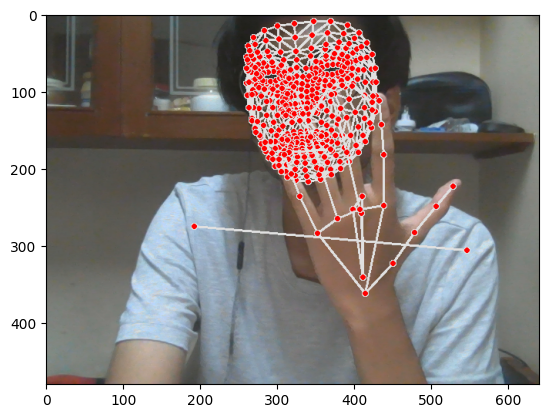

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
results.pose_landmarks

landmark {
  x: 0.7117697
  y: 0.8403309
  z: -1.4134713
  visibility: 0.99351555
}
landmark {
  x: 0.7466815
  y: 0.7699964
  z: -1.4530447
  visibility: 0.98862463
}
landmark {
  x: 0.7573843
  y: 0.7671327
  z: -1.4526898
  visibility: 0.98905754
}
landmark {
  x: 0.7675934
  y: 0.7636343
  z: -1.4528617
  visibility: 0.98754776
}
landmark {
  x: 0.7100669
  y: 0.75369877
  z: -1.4589199
  visibility: 0.9913198
}
landmark {
  x: 0.6945027
  y: 0.7399372
  z: -1.4585181
  visibility: 0.9914505
}
landmark {
  x: 0.6783284
  y: 0.7252685
  z: -1.458739
  visibility: 0.99073315
}
landmark {
  x: 0.7647888
  y: 0.73152155
  z: -1.2376006
  visibility: 0.9913028
}
landmark {
  x: 0.6346959
  y: 0.6672327
  z: -1.2599094
  visibility: 0.99500793
}
landmark {
  x: 0.6983052
  y: 0.8751261
  z: -1.2944046
  visibility: 0.99644125
}
landmark {
  x: 0.6494597
  y: 0.85182893
  z: -1.3030071
  visibility: 0.99772125
}
landmark {
  x: 0.8180164
  y: 0.9274343
  z: -0.8978928
  visibility: 0.9964

In [54]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [55]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [57]:
rh

array([ 5.04888356e-01,  6.69674218e-01,  2.83073859e-07,  4.70213324e-01,
        5.78041911e-01, -6.46241766e-04,  4.55367059e-01,  4.87259060e-01,
       -9.38177574e-03,  4.66551453e-01,  4.10637140e-01, -1.81135405e-02,
        4.92571771e-01,  3.65092874e-01, -2.57737488e-02,  5.11700153e-01,
        4.65459049e-01, -3.15198936e-02,  5.43899655e-01,  3.46927345e-01,
       -4.63472642e-02,  5.59563994e-01,  2.89337814e-01, -4.96092439e-02,
        5.71616948e-01,  2.47494310e-01, -4.90386449e-02,  5.51589072e-01,
        4.91279483e-01, -3.78861018e-02,  5.83745182e-01,  3.55913788e-01,
       -5.02781831e-02,  6.00376368e-01,  2.89971828e-01, -4.92848791e-02,
        6.12656951e-01,  2.44934887e-01, -4.70533632e-02,  5.86303949e-01,
        5.22306442e-01, -4.22072783e-02,  6.15642786e-01,  4.05735880e-01,
       -5.26191443e-02,  6.20046020e-01,  3.71379852e-01, -4.33986709e-02,
        6.18539393e-01,  3.53088617e-01, -3.41425352e-02,  6.13792360e-01,
        5.56426823e-01, -

In [52]:
#lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [53]:
#rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def exract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)    
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
DATA_PATH = os.path.join('MP_Data') 

actions = np.array(['yes','thanks','hello'])

no_sequences = 30

sequence_length = 30

In [90]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [16]:
result_test = exract_keypoints(results)

In [17]:
result_test

array([ 0.7117697 ,  0.8403309 , -1.41347134, ...,  0.        ,
        0.        ,  0.        ])

In [80]:
np.save('0', result_test)

In [81]:
np.load('0.npy')

array([ 0.6145972 ,  0.10736181, -0.66136855, ...,  0.        ,
        0.        ,  0.        ])

In [92]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = exract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [84]:
cap.release()
cv2.destroyAllWindows()

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'yes': 0, 'thanks': 1, 'hello': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
x = np.array(sequences)

In [24]:
y = to_categorical(labels).astype(int)

In [24]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [27]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [28]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [29]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [90]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 192ms/step - loss: 1.1526 - categorical_accuracy: 0.4706
Epoch 2/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.0620 - categorical_accuracy: 0.3765
Epoch 3/2000
3/3 [==============================] - 1s 185ms/step - loss: 1.3103 - categorical_accuracy: 0.4000
Epoch 4/2000
3/3 [==============================] - 1s 194ms/step - loss: 1.1387 - categorical_accuracy: 0.4353
Epoch 5/2000
3/3 [==============================] - 1s 187ms/step - loss: 1.1436 - categorical_accuracy: 0.4706
Epoch 6/2000
3/3 [==============================] - 1s 192ms/step - loss: 1.0994 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 1s 182ms/step - loss: 1.2561 - categorical_accuracy: 0.3765
Epoch 8/2000
3/3 [==============================] - 1s 188ms/step - loss: 1.2927 - categorical_accuracy: 0.4471
Epoch 9/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.4602 - categorical_accuracy:

3/3 [==============================] - 1s 167ms/step - loss: 0.6212 - categorical_accuracy: 0.6706
Epoch 74/2000
3/3 [==============================] - 1s 178ms/step - loss: 0.4522 - categorical_accuracy: 0.7765
Epoch 75/2000
3/3 [==============================] - 1s 188ms/step - loss: 0.6145 - categorical_accuracy: 0.7882
Epoch 76/2000
3/3 [==============================] - 1s 175ms/step - loss: 0.4980 - categorical_accuracy: 0.7176
Epoch 77/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.3173 - categorical_accuracy: 0.8706
Epoch 78/2000
3/3 [==============================] - 1s 184ms/step - loss: 0.2836 - categorical_accuracy: 0.8471
Epoch 79/2000


KeyboardInterrupt: 

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [92]:
res = model.predict(x_test)

1/1 [==============================] - 0s 94ms/step


In [93]:
actions[np.argmax(res[1])]

'hello'

In [94]:
actions[np.argmax(y_test[1])]

'hello'

In [95]:
model.save('m1.h5')

C:\Users\Max Gonsalves\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [97]:
yhat = model.predict(x_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

1/1 [==============================] - 0s 100ms/step


In [98]:
ytrue

[1, 2, 0, 1, 2]

In [99]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [100]:
accuracy_score(ytrue, yhat)

1.0

In [101]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

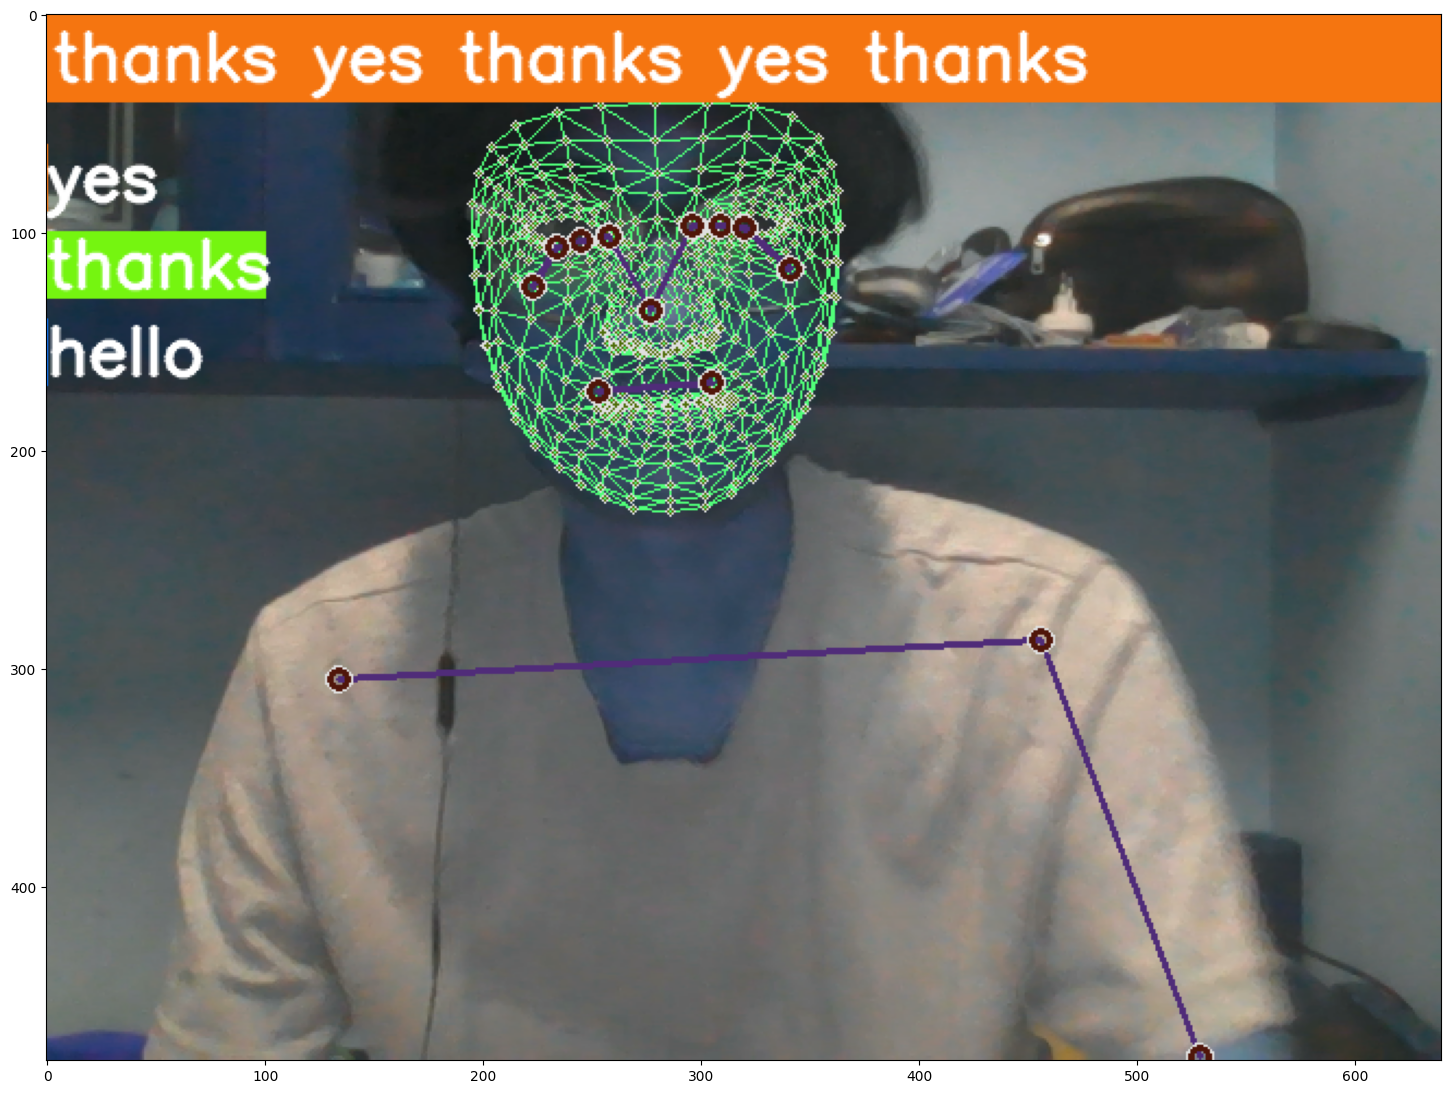

In [50]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [104]:
actions_marathi = np.array(['होय','धन्यवाद','नमस्कार'])

In [107]:
actionstest = np.array(['yes1','thanks1','hello1'])

In [108]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = exract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [112]:
img = np.zeros((500, 500, 3), dtype=np.uint8)
cv2.putText(img, "नमस्ते दुनिया", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [111]:
opencv_version = cv2.__version__

print(f"OpenCV Version: {opencv_version}")

OpenCV Version: 4.8.1
